In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Veri setini oku
df = pd.read_csv("Crop_recommendation.csv")

# Özellikler ve etiket (label) ayrımı
X = df.drop("label", axis=1)
y = df["label"]

# Kategori sayısı
print("Toplam Ürün Sayısı:", y.nunique())
print("Ürünler:", y.unique())


Toplam Ürün Sayısı: 22
Ürünler: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [4]:
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Test seti üzerinde doğruluk
y_pred = model.predict(X_test)
print("Doğruluk Oranı:", accuracy_score(y_test, y_pred))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))


Doğruluk Oranı: 0.9954545454545455

Sınıflandırma Raporu:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.0

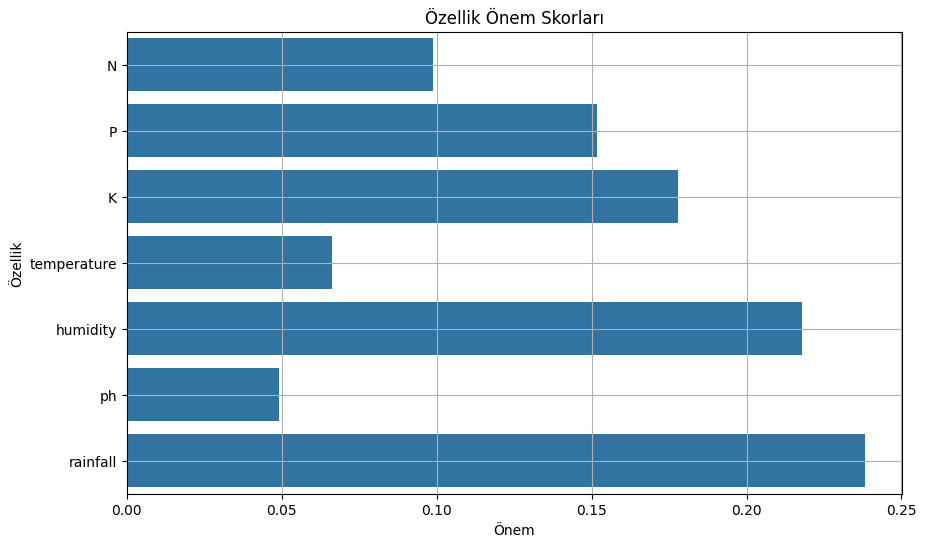

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Özellik Önem Skorları")
plt.xlabel("Önem")
plt.ylabel("Özellik")
plt.grid(True)
plt.show()


In [6]:
print("\n🌱 Bitki Öneri Sistemi")
n = float(input("Topraktaki Azot miktarı (N): "))
p = float(input("Topraktaki Fosfor miktarı (P): "))
k = float(input("Topraktaki Potasyum miktarı (K): "))
temp = float(input("Sıcaklık (°C): "))
hum = float(input("Nem (%): "))
ph = float(input("Toprak pH değeri: "))
rain = float(input("Yağış miktarı (mm): "))

user_input = [[n, p, k, temp, hum, ph, rain]]
prediction = model.predict(user_input)[0]

print(f"\n✅ Önerilen Ürün: **{prediction.upper()}**")



🌱 Bitki Öneri Sistemi
Topraktaki Azot miktarı (N): 0.10
Topraktaki Fosfor miktarı (P): 0.5
Topraktaki Potasyum miktarı (K): 3
Sıcaklık (°C): 2
Nem (%): 5
Toprak pH değeri: 2
Yağış miktarı (mm): 1

✅ Önerilen Ürün: **KIDNEYBEANS**


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
